In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:

df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
df.shape

(714, 3)

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:

clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331181533646322

In [15]:
kbins_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbins_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [16]:
trf = ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second',kbins_fare,[1])
])

In [17]:

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [19]:
output

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [20]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [21]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(42.0, 47.0]","(51.479, 76.292]"
134,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
548,33.0,9.0,20.5250,8.0,"(32.0, 35.0]","(18.75, 26.0]"


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [24]:

X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330790297339594

In [27]:
def discretize(bins,strategy):
    kbins_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbins_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    trf = ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second',kbins_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.635935054773083


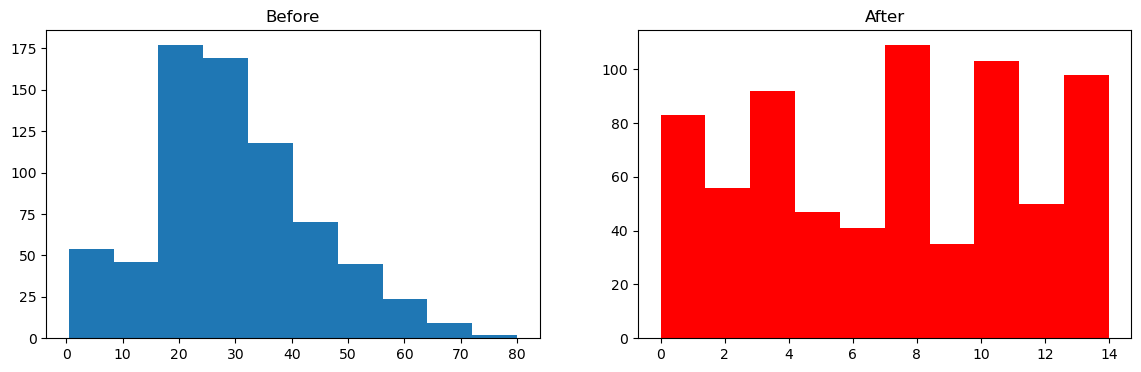

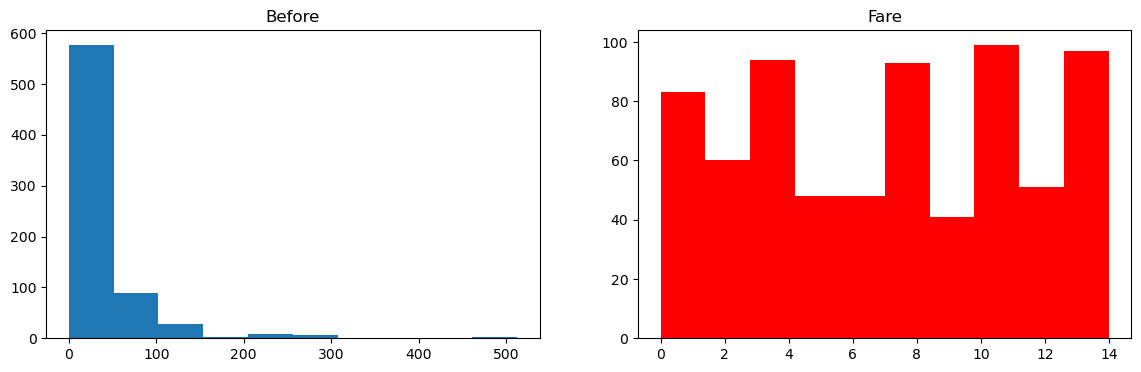

In [34]:
discretize(10,'kmeans')